In [56]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import fftpack
import processing_signals as ps

# plt.figure(figsize=(10, 7))

In [57]:
def signal_1d(a, w, ph, time_counts): # number of oscillations per second
    return a * np.sin(ph + 2 * np.pi * w * time_counts)

Моделируем входной и выходной 2d сигнал на адаптивный фильтр

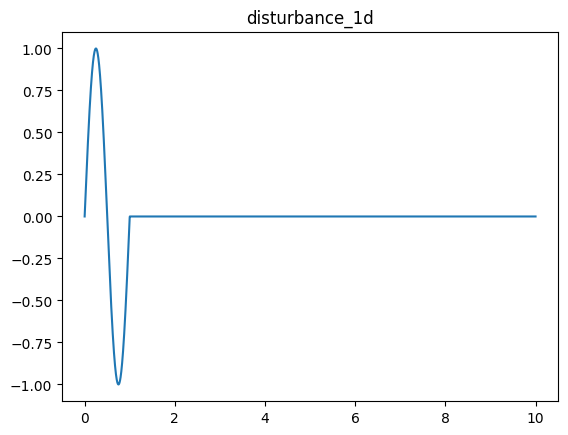

In [58]:
right_bound = 10
number_of_t = 10000
t = np.linspace(0, right_bound, number_of_t, endpoint=False)

disturbance_1d = signal_1d(1, 1, 0, t)
disturbance_1d[int(number_of_t / right_bound):] = 0

# step = 0
# disturbance_1d = np.roll(disturbance_1d, step)

plt.plot(t, disturbance_1d)
plt.title("disturbance_1d")
plt.show()

In [59]:
step = 100
first_input_2d = disturbance_1d

number_of_x = 84
for i in range(1, number_of_x):
    first_input_2d = np.vstack([first_input_2d, np.roll(disturbance_1d, step * i)])
    # plt.plot(t, disturbance_1d)
    # plt.title("disturbance_1d")
    # plt.show()

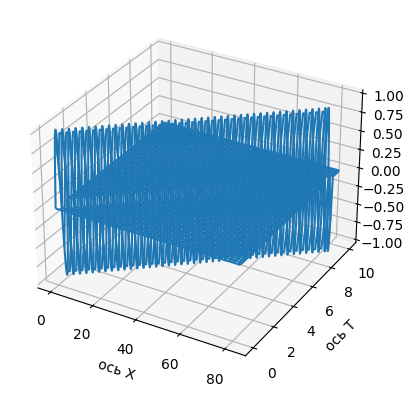

In [60]:
xgrid, tgrid = np.meshgrid(np.arange(number_of_x), t)


ax = plt.axes(projection='3d')
ax.plot_wireframe(xgrid, tgrid, first_input_2d.T)
# ax.plot(tgrid, xgrid, tempU.reshape((len(np.unique(tempT)), len(np.unique(tempX)))))
plt.xlabel("ось X")
plt.ylabel("ось T")
plt.show()

Промоделируем второй входной сигнал такими весами

In [61]:
# processing_weights = np.array([0.1, 0.3, 0.5])
processing_weights_2d = (np.ones((1, number_of_x)) * [[1 / (i + 1) for i in range(number_of_x)]]).reshape((1, number_of_x))
print(processing_weights_2d)

[[1.         0.5        0.33333333 0.25       0.2        0.16666667
  0.14285714 0.125      0.11111111 0.1        0.09090909 0.08333333
  0.07692308 0.07142857 0.06666667 0.0625     0.05882353 0.05555556
  0.05263158 0.05       0.04761905 0.04545455 0.04347826 0.04166667
  0.04       0.03846154 0.03703704 0.03571429 0.03448276 0.03333333
  0.03225806 0.03125    0.03030303 0.02941176 0.02857143 0.02777778
  0.02702703 0.02631579 0.02564103 0.025      0.02439024 0.02380952
  0.02325581 0.02272727 0.02222222 0.02173913 0.0212766  0.02083333
  0.02040816 0.02       0.01960784 0.01923077 0.01886792 0.01851852
  0.01818182 0.01785714 0.01754386 0.01724138 0.01694915 0.01666667
  0.01639344 0.01612903 0.01587302 0.015625   0.01538462 0.01515152
  0.01492537 0.01470588 0.01449275 0.01428571 0.01408451 0.01388889
  0.01369863 0.01351351 0.01333333 0.01315789 0.01298701 0.01282051
  0.01265823 0.0125     0.01234568 0.01219512 0.01204819 0.01190476]]


In [62]:
second_input_2d = ps.processing_of_signal(first_input_2d, processing_weights_2d)

(84, 10000) (1, 84)


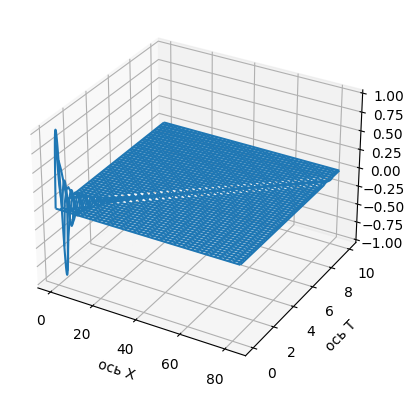

In [63]:
ax = plt.axes(projection='3d')
ax.plot_wireframe(xgrid, tgrid, second_input_2d.T)
# ax.plot(tgrid, xgrid, tempU.reshape((len(np.unique(tempT)), len(np.unique(tempX)))))
plt.xlabel("ось X")
plt.ylabel("ось T")
plt.show()

Подбираем веса свертки

In [64]:
number_of_weights_2d = 1

Можно закомментировать, тк ищутся долго

In [65]:
# approx_weights_2d = ps.fitting_of_NLMS(first_input_2d, second_input_2d, number_of_weights_2d, 0.9, 1)
# print(approx_weights_2d)

Входной и выходной 1d сигнал на адаптивный фильтр

In [66]:
right_bound = 10
number_of_point = 10000
# number_of_point = first_input_1d.size
t = np.linspace(0, right_bound, number_of_point, endpoint=False)

In [85]:
initial_weights_1d = np.array([0.1, 0.3, 0.5, 0.4])

In [86]:
# first_input_1d = 1 / (1 + t) * signal_1d(0.5, 10, 0, t)
first_input_1d = signal_1d(0.5, 10, 0, t)

noise = ps.processing_of_signal(first_input_1d, initial_weights_1d)

second_input_1d = signal_1d(1, 1, 0, t) + noise
# second_input_1d = ps.processing_of_signal(first_input_1d, initial_weights_1d)

(10000,) (4,)


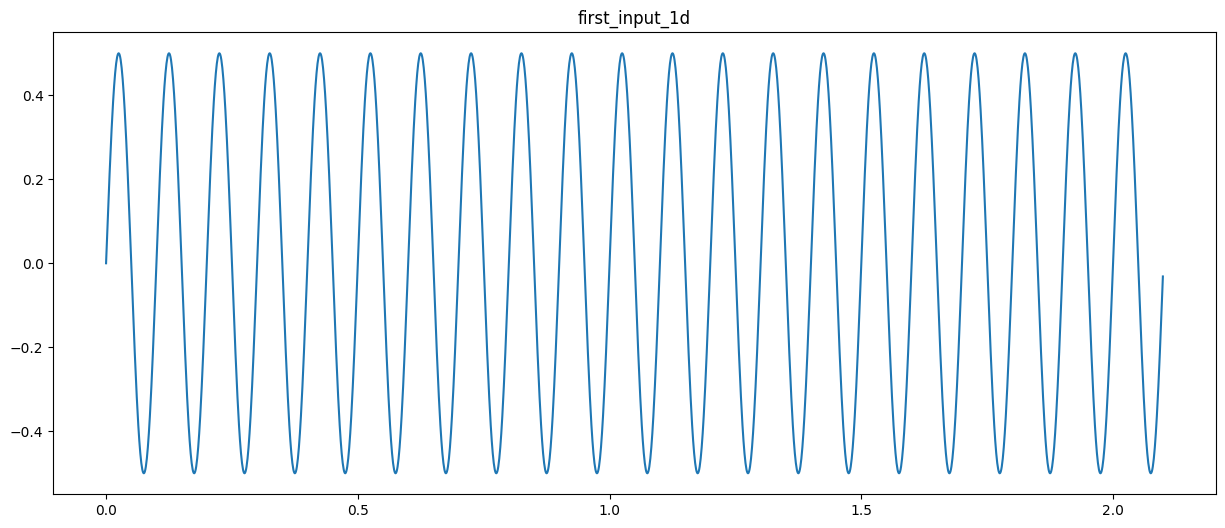

In [176]:
freq_bound = 2100

plt.figure(figsize=(15, 6))
# plt.subplot(1, 2, 1)
plt.plot(t[:freq_bound], first_input_1d[:freq_bound])
plt.title("first_input_1d")
# plt.show()

# freq_bound = 2100
#
# x = fftpack.rfftfreq(first_input_1d.size, right_bound / number_of_point)
# y = 2 * np.abs(fftpack.rfft(first_input_1d)) / first_input_1d.size
#
# plt.subplot(1, 2, 2)
# plt.plot(x[:freq_bound], y[:freq_bound], '.')
# plt.title("AFH of first_input")
plt.show()

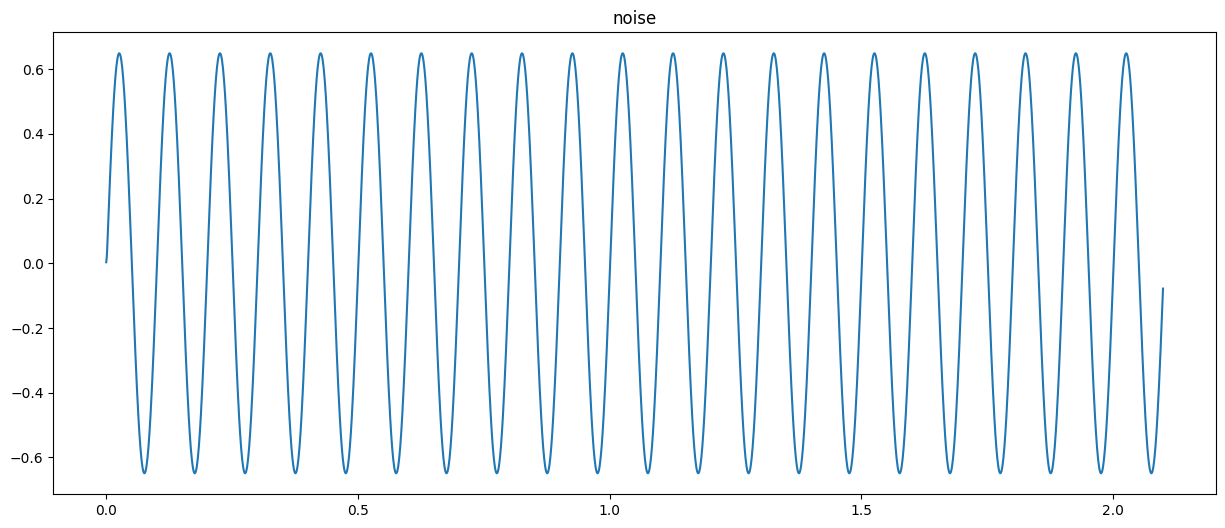

In [177]:
freq_bound = 2100

plt.figure(figsize=(15, 6))
# plt.subplot(1, 2, 1)
plt.plot(t[:freq_bound], noise[:freq_bound])
plt.title("noise")

plt.show()

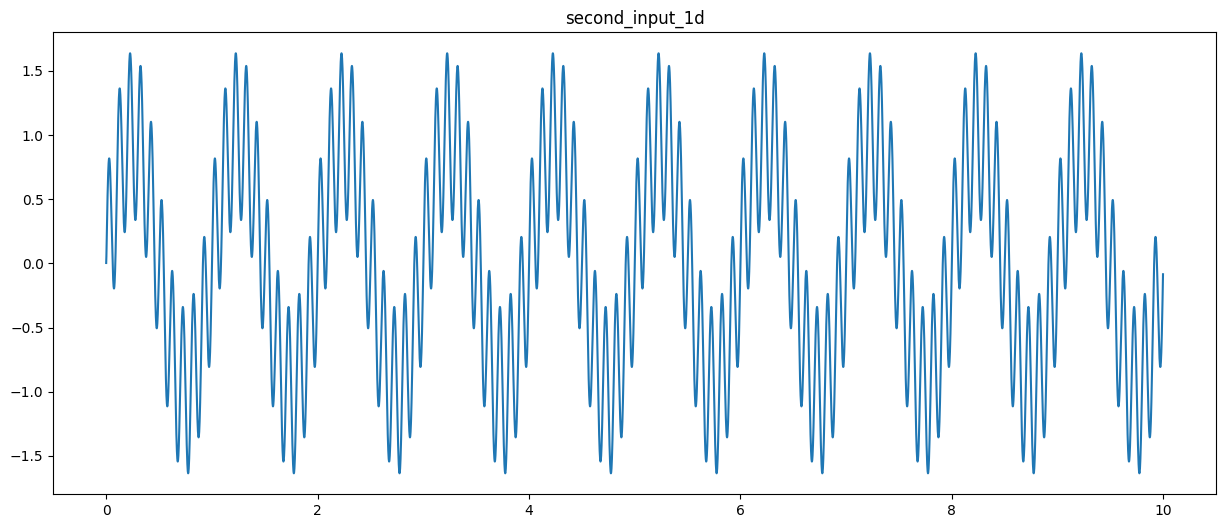

In [174]:
plt.figure(figsize=(15, 6))
# plt.subplot(1, 2, 1)
plt.plot(t, second_input_1d)
plt.title("second_input_1d")
# plt.show()

# freq_bound = 2100
#
# x = fftpack.rfftfreq(second_input_1d.size, right_bound / number_of_point)
# y = 2 * np.abs(fftpack.rfft(second_input_1d)) / second_input_1d.size
#
# plt.subplot(1, 2, 2)
# plt.plot(x[:freq_bound], y[:freq_bound], '.')
# plt.title("AFH of second_input_1d")
plt.show()

Определим длину вектора высовых коэффициентов свертки, которыми мы будем апроксимировать АЧХ исходной системы

In [162]:
number_of_weights = 4

Выведим полученные коэффициенты свертки

In [163]:
approx_weights_LMS_1d = ps.fitting_of_LMS(first_input_1d, second_input_1d, number_of_weights, 0.5, 1)
approx_weights_NLMS_1d = ps.fitting_of_NLMS(first_input_1d, second_input_1d, number_of_weights, 0.9, 1)
approx_weights_RLS_1d = ps.fitting_of_RLS(first_input_1d, second_input_1d, number_of_weights, 0.9999, 1)
print("approx_weights_LMS_1d", approx_weights_LMS_1d)
print("approx_weights_NLMS_1d", approx_weights_NLMS_1d)
print("approx_weights_RLS_1d", approx_weights_RLS_1d)

approx_weights_LMS_1d [0.08970015 0.27885993 0.46868088 0.65734119]
approx_weights_NLMS_1d [0.0600765  0.26986923 0.48176604 0.69300178]
approx_weights_RLS_1d [0.10192579 0.25122218 0.39982859 0.54700761]


Построим сигналы по найденным весам

In [164]:
approx_signal_LMS_1d = ps.processing_of_signal(first_input_1d, approx_weights_LMS_1d)
approx_signal_NLMS_1d = ps.processing_of_signal(first_input_1d, approx_weights_NLMS_1d)
approx_signal_RLS_1d = ps.processing_of_signal(first_input_1d, approx_weights_RLS_1d)

(10000,) (4,)
(10000,) (4,)
(10000,) (4,)


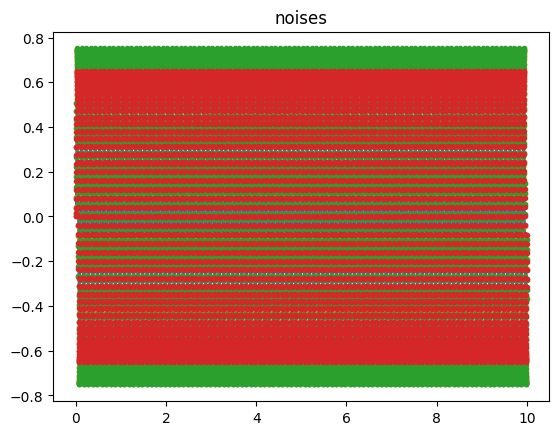

In [165]:
# plt.figure(figsize=(15, 6))
plt.plot(t, noise, label="initial")
plt.plot(t, approx_signal_LMS_1d, ".", label="LMS")
plt.plot(t, approx_signal_NLMS_1d, ".", label="NLMS")
plt.plot(t, approx_signal_RLS_1d, ".", label="RLS")
plt.title("noises")
plt.show()

In [166]:
print("MSE LMS", ps.MSE(noise, approx_signal_LMS_1d))
print("MSE NLMS", ps.MSE(noise, approx_signal_NLMS_1d))
print("MSE RLS", ps.MSE(noise, approx_signal_RLS_1d))

MSE LMS 0.0047581117
MSE NLMS 0.0053079426
MSE RLS 1.8155926e-05


# Рассмотрим АЧХ исходной и полученной передаточной функции

In [167]:
# all_spectrum = np.zeros(t.size)
# all_spectrum[int(t.size / 2)] = 1

all_spectrum = np.zeros(100)
all_spectrum[50] = 1

In [168]:
initial_weights_signal_1d = ps.processing_of_signal(all_spectrum, initial_weights_1d)

(100,) (4,)


In [169]:
# plt.plot(np.arange(100), initial_weights_signal_1d, ".")
# plt.title("initial_weights_signal_1d")
# plt.show()

freq_bound = 1500

initial_fx = fftpack.fftfreq(initial_weights_signal_1d.size, right_bound / number_of_point)
initial_fy = np.abs(fftpack.fft(initial_weights_signal_1d))

# plt.plot(initial_fx[:freq_bound], initial_fy[:freq_bound], ".")
# plt.title("afh_initial_weights_signal_1d")
# plt.show()

In [170]:
approx_signal_LMS_AFH_1d = ps.processing_of_signal(all_spectrum, approx_weights_LMS_1d)
approx_signal_NLMS_AFH_1d = ps.processing_of_signal(all_spectrum, approx_weights_NLMS_1d)
approx_signal_RLS_AFH_1d = ps.processing_of_signal(all_spectrum, approx_weights_RLS_1d)

(100,) (4,)
(100,) (4,)
(100,) (4,)


In [171]:
# plt.plot(np.arange(100), approx_weights_signal_1d, ".")
# plt.title("approx_weights_signal_1d")
# plt.show()

freq_bound = 1500

approx_xfft_signal_LMS_1d = fftpack.fftfreq(approx_signal_LMS_AFH_1d.size, right_bound / number_of_point)
approx_yfft_signal_LMS_1d = np.abs(fftpack.fft(approx_signal_LMS_AFH_1d))

approx_xfft_signal_NLMS_1d = fftpack.fftfreq(approx_signal_NLMS_AFH_1d.size, right_bound / number_of_point)
approx_yfft_signal_NLMS_1d = np.abs(fftpack.fft(approx_signal_NLMS_AFH_1d))

approx_xfft_signal_RLS_1d = fftpack.fftfreq(approx_signal_RLS_AFH_1d.size, right_bound / number_of_point)
approx_yfft_signal_RLS_1d = np.abs(fftpack.fft(approx_signal_RLS_AFH_1d))

# plt.plot(approx_fft_signal_LMS_1d[:freq_bound], approx_fft_signal_LMS_1d[:freq_bound], ".")
# plt.title("afh_approx_weights_signal_1d")
# plt.show()

Наложим их АЧХ друг на друга

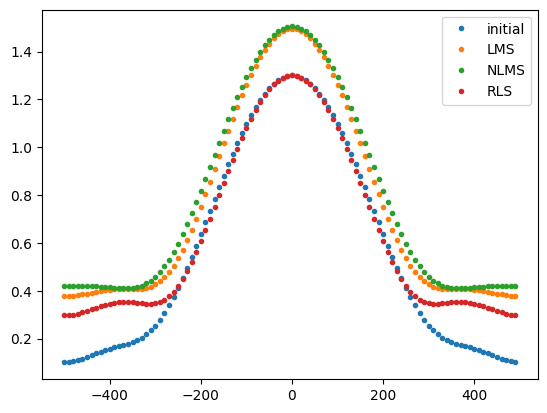

In [172]:
plt.plot(initial_fx, initial_fy, ".", label='initial')
plt.plot(approx_xfft_signal_LMS_1d, approx_yfft_signal_LMS_1d, ".", label='LMS')
plt.plot(approx_xfft_signal_NLMS_1d, approx_yfft_signal_NLMS_1d, ".", label='NLMS')
plt.plot(approx_xfft_signal_RLS_1d, approx_yfft_signal_RLS_1d, ".", label='RLS')
# plt.title(f"double AFH, MSE = {ps.MSE(approx_fy, initial_fy)}")
plt.legend()
plt.show()

In [173]:
print("MSE LMS", ps.MSE(initial_fy, approx_yfft_signal_LMS_1d))
print("MSE NLMS", ps.MSE(initial_fy, approx_yfft_signal_NLMS_1d))
print("MSE RLS", ps.MSE(initial_fy, approx_yfft_signal_RLS_1d))

MSE LMS 0.037429992
MSE NLMS 0.050023824
MSE RLS 0.012997788
